---
# Title: TikTok Predictive Classification Machine Learning Model
# Author: Dominic Quiazon
# Date: 2024-02-25
---

## Table of Contents
#### 1. About
#### 2. Business Task
#### 3. Import Statements
#### 4. The Data for Analysis
#### 5. Exploratory Data Analysis
#### 6. Statistical Testing
#### 7. Regression Analysis
#### 8. Model Constuction
#### 9. Model Evaluation
#### 10. Summary and Business Recommendations

## About

TikTok is a leading figure within short-format entainment while serving as a platform for individuals across the world to socialize and create content. Each day, millions of videos are posted and interacted with by its users. Many of these videos that are posted may contain harmful content that violates TikTok's terms and policy. TikTok users have the ability to report videos and comments that are deemed as harmful, which are characterized as a `claim`. A `claim` can take form as harmful content, statements that violate terms and policy, or statements that contain misinformation. With users' ability to report content claims, reports are sent to moderators, creating a large backlog that need to be reviewed.

## Business Task

Goal: Build a predictive classification machine learning model capable of recognizing whether or not content is a `claim` or is an `opinion`, and predict whether or not a video is deemed a claim given the features avaiable.

Business Tasks: 
1. What variables are relevant to the classification model? 
2. What hidden trends are contained within the data?
3. Which Machine Learning model is best suited to classifying `claims`?

## Import Statements

The following codeblock below details the libraries, modules, functions, and classes that are relevant to conducting exploratory data analysis (EDA), statistical testing, regression analysis, machine learning model building, data visualization, data validation, ensemble learning, cross validation, and model evaluation.

In [1]:
# IMPORT STATEMENTS

# Data Processing and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistical Analysis and Hypothesis Testing
import statsmodels.api as sm
from scipy import stats

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Data Modeling and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

pd.set_option('display.max_columns', None)

## The Data for Analysis

The dataset for analysis is `tiktok_df.csv`. 

The schema is as listed below:

In [2]:
schema = pd.DataFrame(
    {'#':['TikTok assigned number for video with claim/opinion'],
    'claim_status': ['Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source'],
    'video_id':['Random identifying number assigned to video upon publication on TikTok'],
    'video_duration_sec':['How long the published video is measured in seconds'],
    'video_transcription_text':['Transcribed text of the words spoken in the published video'],
    'verified_status':['Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified”'],
    'author_ban_status':['Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned”'],
    'video_view_count':['The total number of times the published video has been viewed'],
    'video_like_count':['The total number of times the published video has been liked by other users'],
    'video_share_count':['The total number of times the published video has been shared by other users'],
    'video_download_count':['The total number of times the published video has been downloaded by other users'],
    'video_comment_count':['The total number of comments on the published video']})

schema

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,TikTok assigned number for video with claim/op...,Whether the published video has been identifie...,Random identifying number assigned to video up...,How long the published video is measured in se...,Transcribed text of the words spoken in the pu...,Indicates the status of the TikTok user who pu...,Indicates the status of the TikTok user who pu...,The total number of times the published video ...,The total number of times the published video ...,The total number of times the published video ...,The total number of times the published video ...,The total number of comments on the published ...


In [3]:
data = pd.read_csv('/kaggle/input/tiktok-df/tiktok_dataset.csv')

## Exploratory Data Analysis

The following codeblocks will reveal insights hidden within the data.

In [4]:
# Data columns and first 5 rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


With the given dataframe, the variables listed detail user and post-related information such as video_id, video_duration_sec, video_transciption_text, verified_status, author_ban_status, video_view_count, video_like_count, video_share_count, video_download_count, and video_count_like. The values contained within these variables/columns will be enable TikTok's data team to be aware of the reach a post receives from other TikTok users. This reveals how well a TikTok video that should be taken down or moderated has reached an audience, allowing for TikTok to formulate an action-plan and code that will mitigate the reach of posts that contain claims or misinformation.

In [5]:
# Data count of rows and columns
data.shape

# Rows: 19,382
# Columns: 12

(19382, 12)

In [6]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


As shown above, the datatypes of the columns are int64, float64, and objects (strings)

Columns containing nulls:
* claim_status
* video_transcription_text
* video_view_count
* video_like_count
* video_download_count
* video_comment_count

Using the data.info() function, the output gives users the ability to recognize the datatypes involved within each variable and also the size and dimensions of the dataframe. Overall, the dataframe comprises 19,382 rows of data and 12 columns that detail specific variables. These variables are user and post-related data, and will serve as the basis for the predictive algorithm. 

Further, the dataframe contains null values, which may cause concern when conducting further analysis and will need to be reviewed. However, what stands out is that only 4 out of 12 variables are string data types while the remaining 8 are all numeric. The "#" variable can be removed as a variable as the Pandas dataframe class provides indices for row counts. All other numeric variables can be kept and pertain solely to post-related data. 

In [7]:
# Data desciptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Using the data.describe() function, the most clear distribution of variables is within the video_view_count. The video_view_count enables observation of the reach of posts deemed a "claim," and reviewing the data shows that the max views a user obtained was 999,817 views, which can highly be of concern if the post is a claim. The video_share_count is also of concern as more shares will lead to a higher chance of spread of misinformation with its max value of 256,130 shares. 

A variable that does not seem integral to the analysis is the video_download_count due to it not defining any significant impact of the reach of a video. Lastly, the video_like_count max does seem to be an outlier if you compare it to the max video_view_count as it seems questionable that a post attained interaction of likes based on 2/3 of its audience. 

In [8]:
# Count of claim_status
print(data['claim_status'].value_counts())
print('')
print(data['claim_status'].value_counts(normalize=True))

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64


In [9]:
# Average View Count for content deemed as a 'claim'

mask_claim = data['claim_status'] == 'claim'

avg_views_claims = data[mask_claim]['video_view_count'].mean()
median_views_claims = data[mask_claim]['video_view_count'].median()

views_for_claims = pd.DataFrame(
    {'avg_views_claims': [avg_views_claims],
    'median_views_claims': [median_views_claims]})

views_for_claims

,avg_views_claims,median_views_claims
0,501029.452748,501555.0


In [10]:
# Average View Count for content deemed as a 'opinion'

mask_opinion = data['claim_status'] == 'opinion'

avg_views_opinion = data[mask_opinion]['video_view_count'].mean()
median_views_opinion = data[mask_opinion]['video_view_count'].median()

views_for_opinions = pd.DataFrame(
    {'avg_views_opinion': [avg_views_opinion],
    'median_views_opinion': [median_views_opinion]})

views_for_opinions

,avg_views_opinion,median_views_opinion
0,4956.43225,4953.0


As observed, content posted that is deemed as a claim, receives over 100x more views that content that is deemed an opinion. This is a dramatic difference and will be reviewed further.

In [11]:
# Count of each variable and grouped by claim_status
data.groupby('claim_status').count()

,#,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
claim_status,,,,,,,,,,,
claim,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608,9608
opinion,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476,9476


In [12]:
# Count of each variable and grouped by author_ban_status
data.groupby('author_ban_status').count()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
author_ban_status,,,,,,,,,,,
active,15663,15383,15663,15663,15383,15663,15383,15383,15383,15383,15383
banned,1639,1635,1639,1639,1635,1639,1635,1635,1635,1635,1635
under review,2080,2066,2080,2080,2066,2080,2066,2066,2066,2066,2066


#### Feature Engineering

In [13]:
# author_ban_status descriptive statistics by target columns
data.groupby('author_ban_status').agg(
                                    {'video_view_count': ['mean', 'median', 'count'],
                                    'video_like_count': ['mean', 'median', 'count'],
                                    'video_share_count': ['mean', 'median', 'count']})

video_view_count                  video_like_count  \
                              mean    median  count             mean   
author_ban_status                                                      
active               215927.039524    8616.0  15383     71036.533836   
banned               445845.439144  448201.0   1635    153017.236697   
under review         392204.836399  365245.5   2066    128718.050339   

                                   video_share_count                  
                     median  count              mean   median  count  
author_ban_status                                                     
active               2222.0  15383      14111.466164    437.0  15383  
banned             105573.0   1635      29998.942508  14468.0   1635  
under review        71204.5   2066      25774.696999   9444.0   2066

In [14]:
# claim_status and author_ban_status by likes_per_view, comments_per_view, shares_per_view

# likes_per_view
data['likes_per_view'] = data['video_like_count']/data['video_view_count']
# comments_per_view
data['comments_per_view'] = data['video_comment_count']/data['video_view_count']
# shares_per_view
data['shares_per_view'] = data['video_share_count']/data['video_view_count']

data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

Text(0.5, 1.0, 'Video Duration in Seconds')

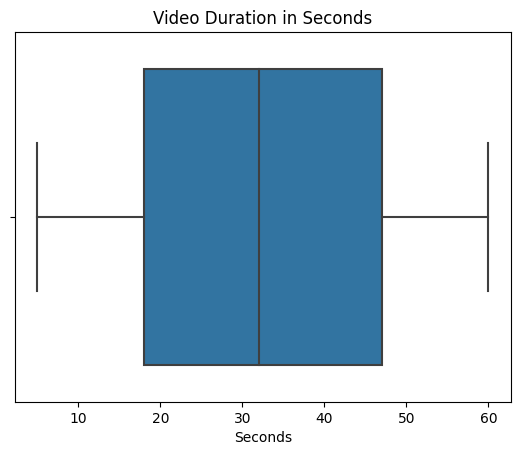

In [15]:
# Boxplot to visualize spread of video_duraction_sec
duration_boxplot = sns.boxplot(x=data['video_duration_sec'])
plt.xlabel('Seconds')
plt.title('Video Duration in Seconds')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '−10'),
  Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

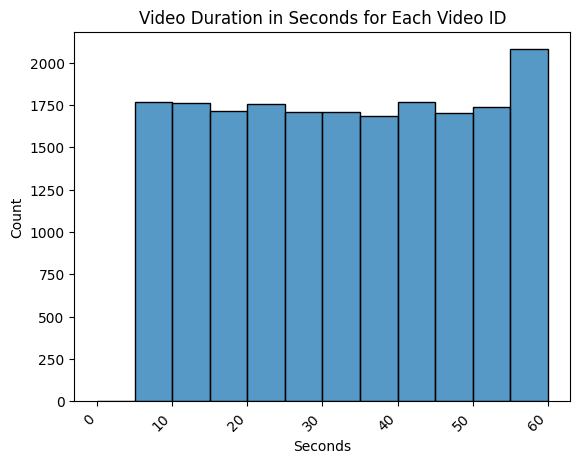

In [16]:
# Distribution of video_duration_sec
duration_histogram =  sns.histplot(data['video_duration_sec'], bins=range(0,61,5))

plt.title('Video Duration in Seconds for Each Video ID')
plt.xlabel('Seconds')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 1.0, 'Video View Count')

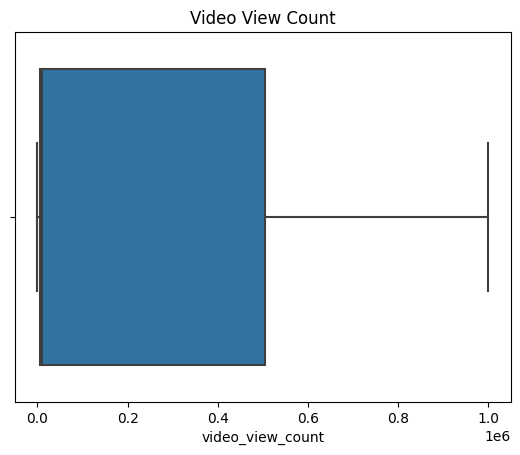

In [17]:
# Boxplot of video_view_count
view_boxplot =  sns.boxplot(x=data['video_view_count'])
plt.title('Video View Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video View Count Histogram')

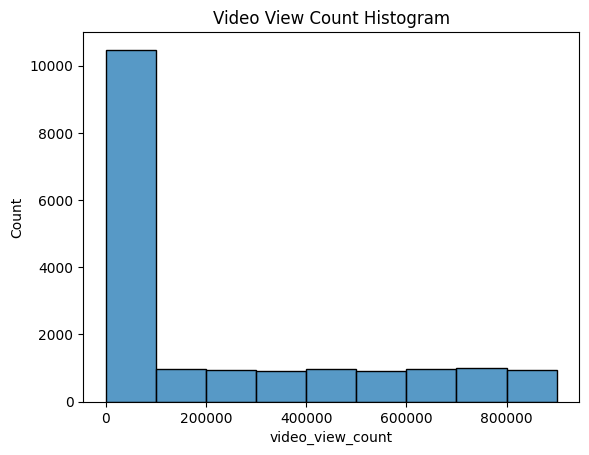

In [18]:
# Distribution of video_view_count
view_histogram = sns.histplot(data['video_view_count'], bins=range(0, (10**6), 10**5 ))
plt.title('Video View Count Histogram')

<Figure size 1000x200 with 0 Axes>

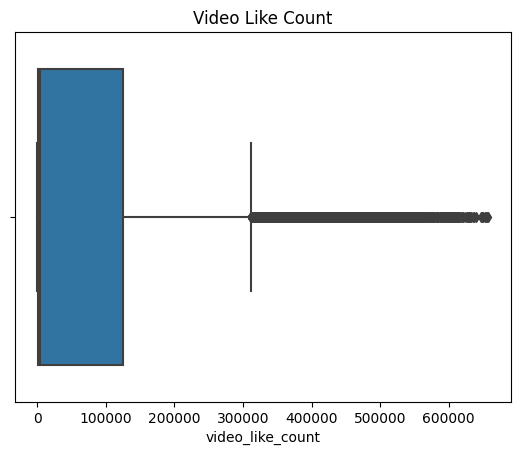

<Figure size 1000x200 with 0 Axes>

In [19]:
# Boxplot of video_like_count
like_boxplot = sns.boxplot(x=data['video_like_count'])
plt.title('Video Like Count')
plt.figure(figsize=(10,2))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


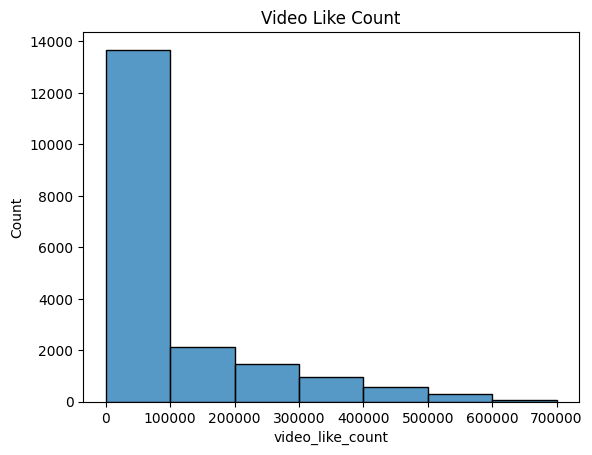

In [20]:
# Distribution of video_like_count
like_histogram = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
like_histogram.set_xticks(range(0,7*10**5+1,10**5))
plt.title('Video Like Count');

Text(0.5, 1.0, 'Video Comment Count')

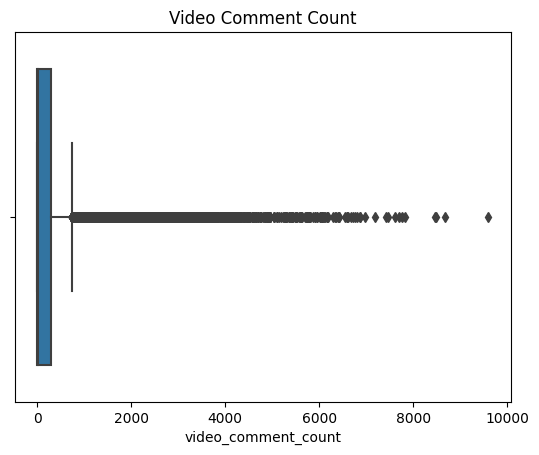

In [21]:
# Boxplot of video_comment_count
comment_boxplot = sns.boxplot(x=data['video_comment_count'])
plt.title('Video Comment Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Video Comment Count')

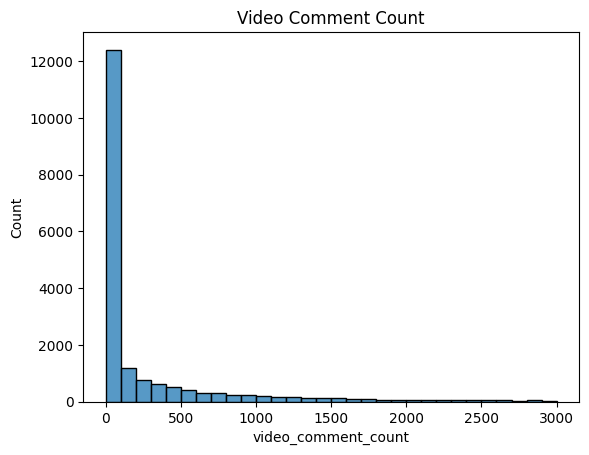

In [22]:
# Distribution of video_comment_count
comment_histogram = sns.histplot(data['video_comment_count'], bins=range(0,3001, 100))
plt.title('Video Comment Count')

Text(0.5, 1.0, 'Video Share Count')

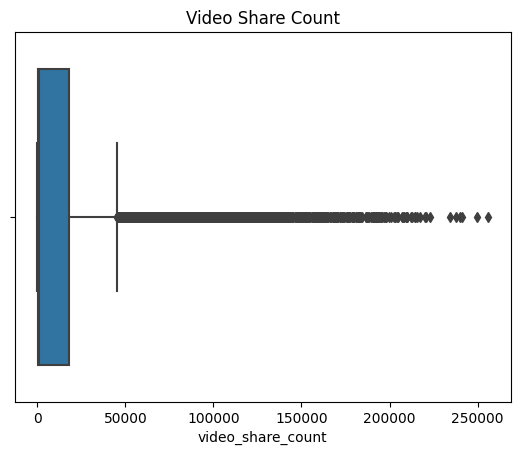

In [23]:
# Boxplot of video_share_count
share_boxplot = sns.boxplot(x=data['video_share_count'])
plt.title('Video Share Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


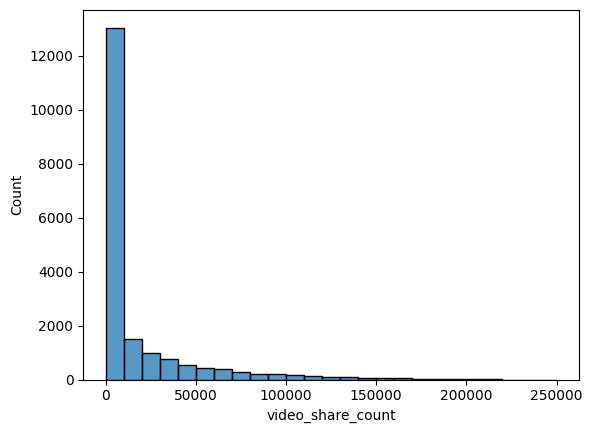

In [24]:
# Distribution of video_share_count
share_histogram = sns.histplot(data['video_share_count'], bins=range(0,260000,10000))

Text(0.5, 1.0, 'Video Download Count')

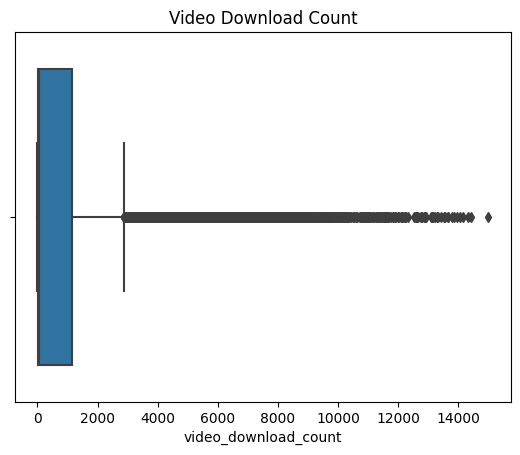

In [25]:
# Boxplot of video_download_count
download_boxplot = sns.boxplot(x=data['video_download_count'])
plt.title('Video Download Count')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


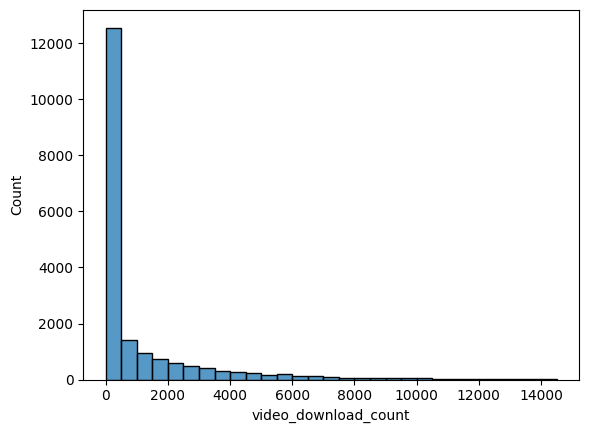

In [26]:
# Distribution of video_download_count
download_histogram = sns.histplot(data['video_download_count'], bins=range(0,15000,500))

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

Text(0.5, 1.0, 'Claim Status by Verified Status')

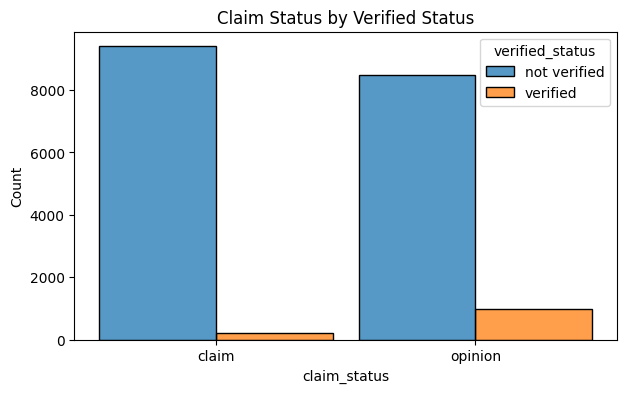

In [27]:
# claim_status by verified_status

plt.figure(figsize=(7,4))
verification_histogram = sns.histplot(data=data,
                                      x='claim_status',
                                     hue='verified_status',
                                     multiple='dodge',
                                     shrink=0.9)
plt.title('Claim Status by Verified Status')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

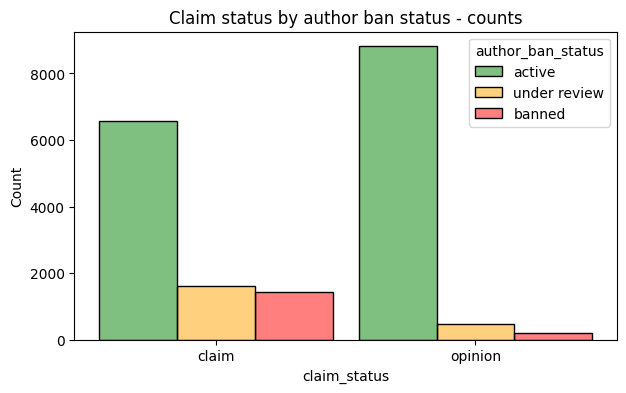

In [28]:
# claim_status by author_ban_status
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

Text(0.5, 1.0, 'Median View Count of Ban Status')

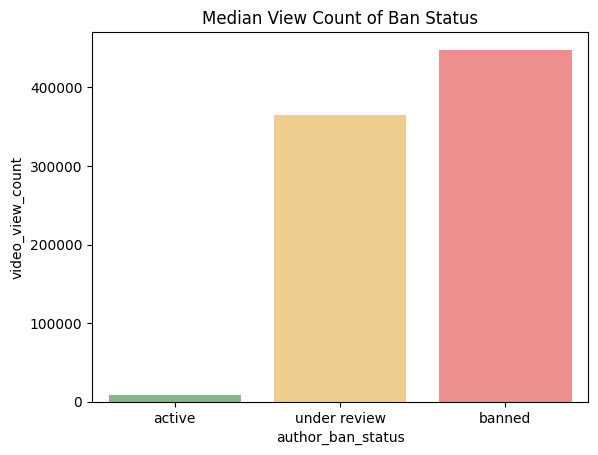

In [29]:
# Median View Count by author_ban_status
ban_status_counts = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

median_ban_status_bar = sns.barplot(data=ban_status_counts,
                                   x='author_ban_status',
                                   y='video_view_count',
                                   order=['active', 'under review', 'banned'],
                                   palette={'active': 'green', 'under review': 'orange', 'banned': 'red'},
                                   alpha=0.5)
plt.title('Median View Count of Ban Status')

Text(0.5, 1.0, 'Total Views By Video Claim Status')

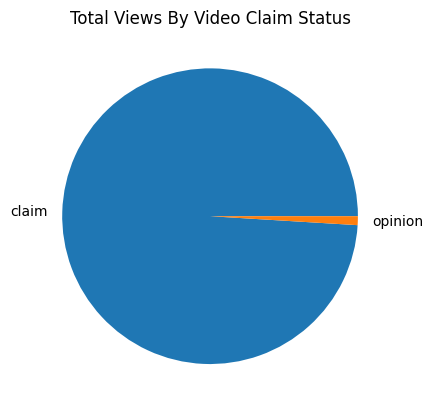

In [30]:
# Pie chart of total views by claim_status
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total Views By Video Claim Status')

In [31]:
# Outliers
count_cols = ['video_view_count',
             'video_like_count',
             'video_share_count',
             'video_download_count',
             'video_comment_count']

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = iqr *1.5 + median

    # count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of Outliers, {column}:', outlier_count)

Number of Outliers, video_view_count: 2343
Number of Outliers, video_like_count: 3468
Number of Outliers, video_share_count: 3732
Number of Outliers, video_download_count: 3733
Number of Outliers, video_comment_count: 3882


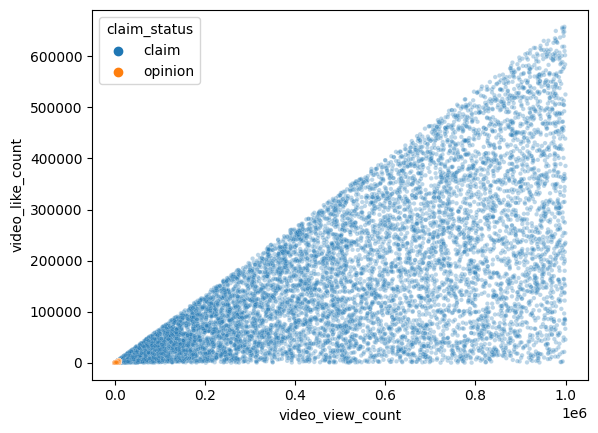

In [32]:
# Scatterplot of video_view_count vs. video_like_count by claim_status
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

## Statistical Testing

Given the distribution data above for video_view_count, it is necessary to to determine if there is a correlation between the video_view_count and the verified_status of users. The goal of this statistical test is to determine if verified_status is a  indicator of claim_status given the features within the dataset. The statistical testing, method being applied, and the hypotheses will be covered later.

In [33]:
# Handle nulls and count of verified_status
data = data.dropna(axis=0)
data['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [34]:
# mean video_view_count for each group in verified_status

verified_data = data[data['verified_status'] == 'verified']
unverified_data = data[data['verified_status'] == 'not verified']

mean_views_verified = verified_data['video_view_count'].mean()
mean_views_unverified = unverified_data['video_view_count'].mean()

print('mean video_view_count for verified users: ', mean_views_verified)
print('mean video_view_count for unverified users: ', mean_views_unverified)

mean video_view_count for verified users:  91439.16416666667
mean video_view_count for unverified users:  265663.78533885034


With the mean video_view_count for each type of verified user-type computed, the average of views between verified and unverified users is undoubtedly concerning. Unverified users seem to gain almost triple the amount of views on average than users who are verified. These statistics shape the path of the Hypothesis test to be conducted below:

In [35]:
print(verified_data.size)
print('')
print(unverified_data.size)

18000

268260


#### Hypothesis Test

Test type: Two-sample T-Test

**Hypotheses:**

**$H_0$**: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts 

**$H_A$**: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts 

**Significance Level: 5%**

In [36]:
# Two-Sample T-Test
stats.ttest_ind(a=verified_data['video_view_count'], b=unverified_data['video_view_count'], equal_var=False)

TtestResult(statistic=-25.499441780633777, pvalue=2.6088823687177823e-120, df=1571.163074387424)

#### Hypothesis Test Results

**Significance Level: 0.05**

**P-Value: -2.61e-120**

**Conclusion:**

P-Value 2.61 e-120 < 0.05 Significance Level

At the 5% significance level, we reject the null hypothesis that there is no difference in the number of views between TikTok videos posted by verified and unverified users, in favor of the alternative that THERE IS A DIFFERENCE in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts




The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts. This suggests there might be fundamental behavioral differences between these two groups of accounts.

The root cause of this disparity between verified_status and video_view count could be due to behavioral differences of account owners.

## Regression Analysis

The goal of this regression analysis is to predict verified_status and see if the features contained within the data are indicative of the actual verified_status users' obtain. A variety of processes will need to be conducted prior to conducting the final logistic regression.

In [37]:
# Class balance of verified_status
data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

It is clear that 'not verified' users are the majority class

In [38]:
# Resampling to create class balance of outcome variable

# Assignment of majority and minority classes
data_majority = data[data['verified_status'] == 'not verified']
data_minority = data[data['verified_status'] == 'verified']

# Upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Concat Majority and Minority Dataframes
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Class counts
data_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [39]:
# Average length of video_transciption_text length by verified_status
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [40]:
# Extraction of length of video_transcription_text as a new coluimn in data_upsampled
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))
data_upsampled = data_upsampled.drop(['#','likes_per_view','comments_per_view', 'shares_per_view'], axis=1).reset_index(drop=True)
data = data.drop(['#','likes_per_view','comments_per_view', 'shares_per_view'], axis=1).reset_index(drop=True)
data_upsampled.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

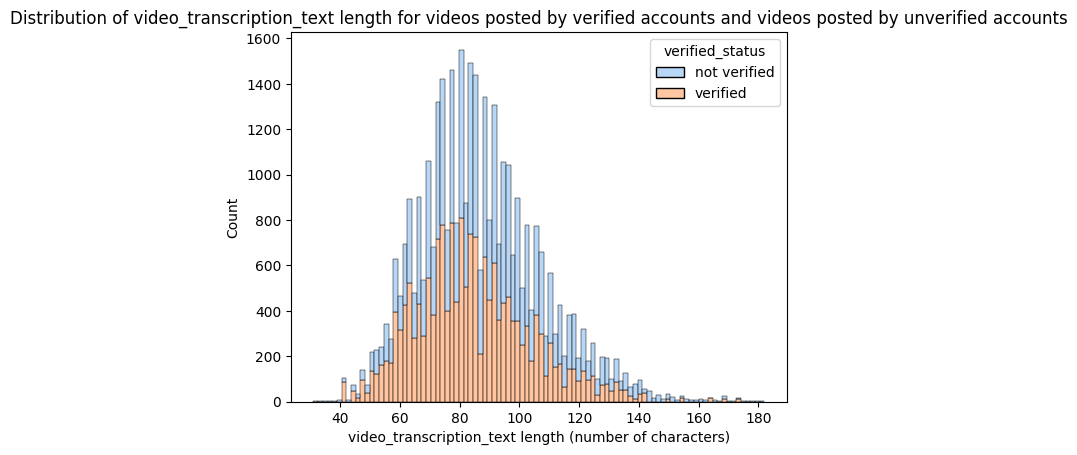

In [41]:
# Distribution of video_transcription_text by verified_status
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

In [42]:
# Correlations across variables
data_upsampled.corr(numeric_only=True)

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_id,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


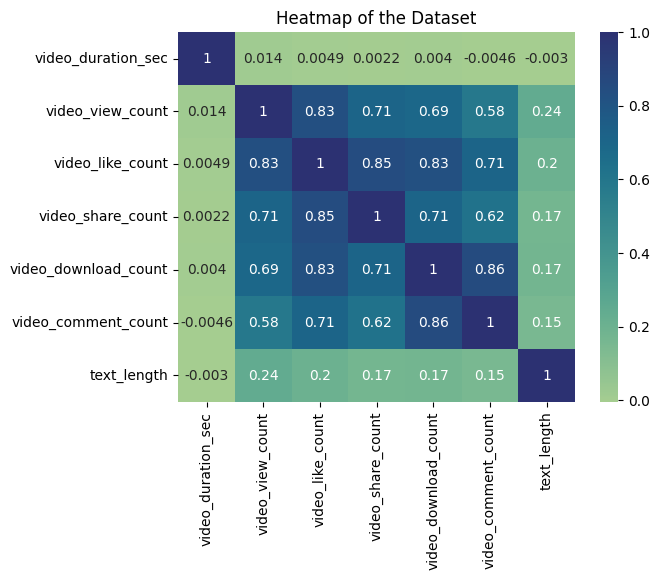

In [43]:
# Correlation Heatmap of Variables
sns.heatmap(
        data_upsampled[['video_duration_sec', 'claim_status', 'author_ban_status', 'video_view_count',
                        'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'text_length']]
        .corr(numeric_only=True),
        annot=True,
        cmap='crest')
plt.title('Heatmap of the Dataset')
plt.show()

CC = Correlation Coefficient

Correlated Variables:
* video_view_count and video_like_count (0.86 CC) 
* video_download_count and video_comment_count (0.84 CC)
* video_like_count and video_share_count (0.83 CC)
* video_like_count and video_download_count (0.81 CC)


#### Construction of Regression Model

In [44]:
# Isolation of Outcome Variable
y = data_upsampled['verified_status']

In [45]:
# Isolation of Features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

In [46]:
# Split Data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [47]:
# Isolate categorical features to encode
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

In [48]:
# Creation of Encoder of categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform training features
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)
X_encoder.get_feature_names_out()
X_train_encoded

# Place encoded features into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Drop intial categorical training features
X_train.drop(columns=['claim_status', 'author_ban_status'])

# Concat encoded features into new dataframe with orignical training dataframe
X_train_final = pd.concat([X_train.drop(columns=['claim_status', 'author_ban_status']).reset_index(drop=True), X_train_encoded_df], axis=1)
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [49]:
# Repeat the Encoder Process for Outcome Variable
y_encoder = OneHotEncoder(drop='first',sparse_output=False)

y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_train_final



array([1., 1., 1., ..., 1., 1., 0.])

In [50]:
# Construct Logistic Regression Model and Fit to Training Set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [51]:
# Encode Testing sets
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]
X_test_encoded = X_encoder.transform(X_test_to_encode)
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())
X_test.drop(columns=["claim_status", "author_ban_status"])
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

In [52]:
# Apply Testing Set to get Predictions
y_pred = log_clf.predict(X_test_final)

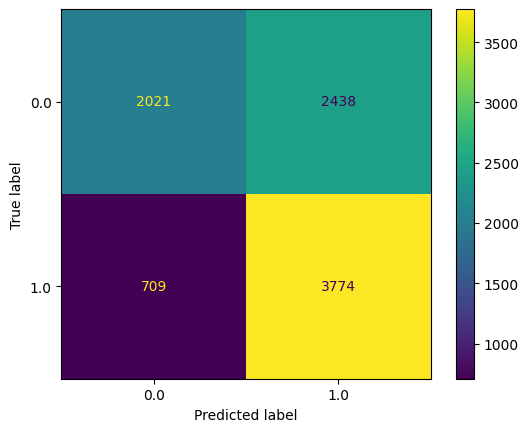

In [53]:
# Visualize Model Results

# Values for Confusion Matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Confusion Matrix Display
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot Confusion Matrix
log_disp.plot()

# Display Plot
plt.show()

In [54]:
# Classification Report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



In [55]:
# Interpret Model Coefficients and Features
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.493546e-03
1,video_view_count,-2.277453e-06
2,video_share_count,5.458611e-06
3,video_download_count,-2.143023e-04
4,video_comment_count,3.899371e-04
5,claim_status_opinion,3.772015e-04
6,author_ban_status_banned,-1.675961e-05
7,author_ban_status_under review,-7.084767e-07


#### Logistic Regression Interpretation

* The dataset presented the model with only a small amount of strongly correlated variables. A strong correlation across variables can lead to the violation of the multicollinearity assumption.
* Each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status
* The model obtained barely passing predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable

We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small. The hope of this model was to see if verified_status was indicative of claim_status, however, this seems not to be the case.

The results of this model will serve as a basis to the forthcoming Machine Learning model, which will be constructed next to predict claim_status.

## Machine Learning Model Construction

The following codeblocks will ensure the preparation of the data for the machine learning model to recoginize the classification of content as`claim` or `opinion` based on the training dataset that will be fitted to the model, and will later be tested on test data to predict the outcome variable based on the features presented.

#### Exploratory Data Analysis

In [56]:
# Preview columns and rows
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [57]:
# Preview count of rows and columns/features
data.shape

(19084, 11)

In [58]:
# Check for null values
data.isna().sum()

claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [59]:
# Check for duplicates
data.duplicated().sum()

0

In [60]:
# Obtain descriptive statisitics
data.describe()

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


##### Note:
Tree-based models are robust to outliers. Given that the model is one that will classify data, a tree-based supervised model approach will disregard outliers. 

In [61]:
# Outcome variable class balance
data['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

#### Feature Engineering

In [62]:
# Creation of 'text_length' column
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


In [63]:
# Average text_length by claim_status
data[['claim_status', 'text_length']].groupby('claim_status').mean()

,text_length
claim_status,
claim,95.376978
opinion,82.722562


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

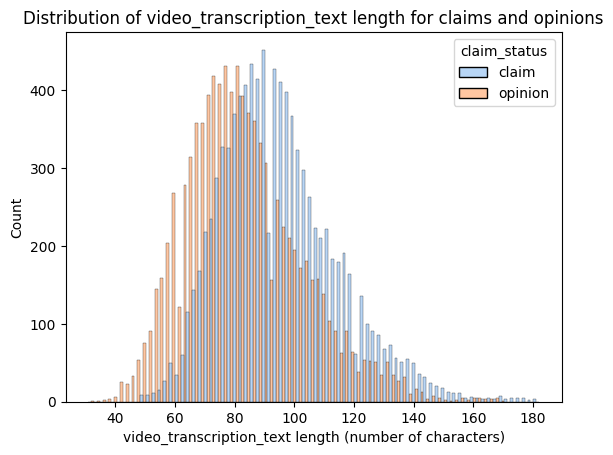

In [64]:
# Distribution of text_length by claim_status
sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)

plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show();

In [65]:
# Feature Selection and Transformation 

# Copy of data saved as 'X'
X = data.copy()

# Drop columns not vital to analysis
X = X.drop(['video_id'], axis=1)

# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

/tmp/ipykernel_18/1931250747.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### Splitting the Data

In [66]:
# Isolation of Outcome/Target Variable

y = X['claim_status']

In [67]:
# Isolation of Features for Model
X = X.drop(['claim_status'], axis=1)

#### Creation of Train/Validation/Test Datasets

In [68]:
# Split of training and test datasets, 80/20 split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [69]:
# Split into training and validation datasets, resulting in a 60/20/20 train/validation/test sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

In [70]:
# Shape and size of each set
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('')
print('X_test Shape: ', X_test.shape)
print('y_test Shape: ', y_test.shape)
print('')
print('X_tr Shape: ', X_tr.shape)
print('y_tr Shape: ', y_tr.shape)
print('')
print('X_val Shape: ', X_val.shape)
print('y_val Shape: ', y_val.shape)

X_train Shape:  (11450, 11)
y_train Shape:  (11450,)

X_test Shape:  (3817, 11)
y_test Shape:  (3817,)

X_tr Shape:  (15267, 11)
y_tr Shape:  (15267,)

X_val Shape:  (3817, 11)
y_val Shape:  (3817,)


#### Natural Language Processing 
NLP will be applied to the `video_transciption_text` given the nature of the column and how vital it is to recognizing videos as harmful content or one that violates TikTok term's and policy. NPL will be used in tandem with the CountVectorizer module to tokenize the transciption of videos.

In [71]:
# Instantiate CountVectorizer
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')

# Extraction of numerical features from video_transciption_text in training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()

# Place Numerical values of NLP transcripted features in a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Concat X_train and count_df to replace video_transcription_text column
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
# Repeat NLP process for TEST and VALIDATION datasets

# Validation set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Test set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']).reset_index(drop=True), test_count_df], axis=1)

#### Model Construction

The following codeblocks will detail the construction of Machine Learning Models

##### Random Forest Model

In [73]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(random_state=0)

# Dictionary of Hyperparameters
cv_params = {'max_depth':[5,7,None],
             'max_features':[0.3, 0.6],
             'max_samples':[0.7],
             'min_samples_leaf':[1,2],
             'min_samples_split':[2,3],
            'n_estimators':[75,100,200]
            }

# Dictionary of Scoring Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}


# Instantiate GridSearchCV (for cross-validation)
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

Recall is the scoring metric being utilized to determine the best model given the hyperparameters being set and the number of folds being created during cross-validation and ensemble learning. The reasoning being this is due to the severity of the model misclassifying a post a one that is an `opinion` when it is actually a `claim`, which is a false negative (Type II Error). With its severity, a type II error would result in harmful content being spread and a video to be viewed by TikTok mass audeince that violates terms and policy. Type I error is also harmful, yet can be reviewed by moderators and be realized as one that passes a moderator's review.

In [74]:
# Fit training data to the model
%time
rf_cv.fit(X_train_final, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.15 µs


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [75]:
# Best Recall Score
rf_cv.best_score_

0.9948228253467271

In [76]:
# Best Parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [77]:
# Save Model Results in Table

# Creation of a Function to Save Results
def make_results(model_name, model_object):
    
    cv_results = pd.DataFrame(model_object.cv_results_) # Get all the results from the CV and put them in a df
    best_estimator_results = cv_results.iloc[cv_results['mean_test_recall'].idxmax(), :] # Isolate the row of the df with the max(mean f1 score)
    
    f1 = best_estimator_results.mean_test_f1 # Extract accuracy, precision, recall, and f1 score from that row
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table


# Random Forest Model Results Table
rf_cv_results = make_results('Random Forest CV', rf_cv)
rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.997145,0.994823,0.999481,0.997118


#### XGBoost Model

In [78]:
# Instantiate XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Dictionary of Hyperparameters
cv_params = {'max_depth':[4,8,12],
            'min_child_weight':[3,5],
            'learning_rate':[0.01,0.1],
            'n_estimators':[300,500]
            }

# Dictionary of Scoring Metrics
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate GridSearchCV
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5,refit='recall')

In [79]:
# Fit training data to the model
%time
xgb_cv.fit(X_train_final, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'f1', 'recall', 'precision', 'accuracy'})

In [80]:
# XGBoost Model Results Table
xgb_cv_results = make_results('XGBoost CV', xgb_cv)
xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.994363,0.989818,0.998954,0.994323


In [81]:
# Concat Tables
rf_xgb_results = pd.concat([xgb_cv_results, rf_cv_results], axis=0).reset_index(drop=True)
rf_xgb_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost CV,0.994363,0.989818,0.998954,0.994323
1,Random Forest CV,0.997145,0.994823,0.999481,0.997118


## Machine Learning Model Evaluation

The following codeblocks will evaluate both the Random Forest and XGBoost Machine Learning models on the Validation dataset. The model with the more accuracate results will be chosen as the champion model to be tested on the Test dataset.

#### Random Forest

In [82]:
# Random Forest Predictions on Encoded Validation Set
y_pred_rf = rf_cv.best_estimator_.predict(X_val_final)

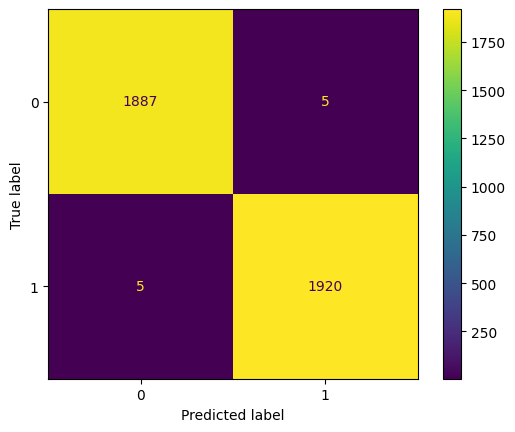

In [83]:
# Confusion Matrix to Visualize Results of Random Forest Model

# Confusion Matrix Creation
rf_cm = confusion_matrix(y_val, y_pred_rf, labels=rf_cv.classes_)

# Display of Confusion Matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_cv.classes_)

# Plot confusion matrix
disp1.plot(values_format='')
plt.show()

##### Random Forest Results on Validation Dataset

* Upper-left: Number of True Negatives
    * Number of opinions that the model accurately classified as opinions

* Upper-right: Number of False Positives
    * Number of opinions that the model misclassified as claims.

* Lower-left: Number of False Negatives
    * Number of claims that the model misclassified as opinions.

* Lower-right: Number of true positives
    * Number of claims that the model accurately classified as claims
    
 
 Given the confusion matrix above, the model only misclasified 5 false positives and 5 false negatives

In [84]:
# Classification Report of Random Forest Model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_rf, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



#### XGBoost

In [85]:
# XGBoost Predictions on Encoded Validation Set
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val_final)

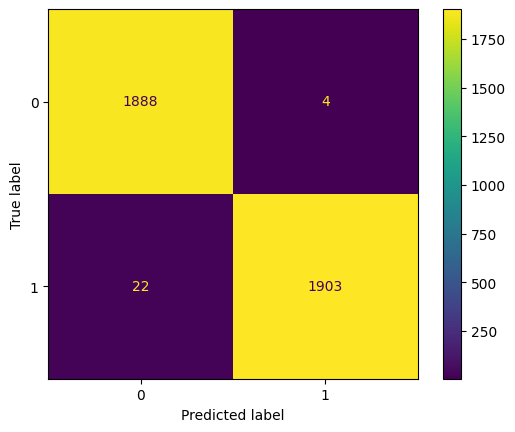

In [86]:
# Confusion Matrix to Visualize Results of XGBoost Model

# Confusion Matrix Creation
xgb_cm = confusion_matrix(y_val, y_pred_xgb)

# Display of Confusion Matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix=xgb_cm, display_labels=xgb_cv.classes_)

# Plot confusion matrix
disp2.plot(values_format='')
plt.show()

##### XGBoost Results on Validation Dataset

* Upper-left: Number of True Negatives
    * Number of opinions that the model accurately classified as opinions

* Upper-right: Number of False Positives
    * Number of opinions that the model misclassified as claims.

* Lower-left: Number of False Negatives
    * Number of claims that the model misclassified as opinions.

* Lower-right: Number of true positives
    * Number of claims that the model accurately classified as claims
    
 
 Given the confusion matrix above, the model only misclasified 4 false positives and 22 false negatives

In [87]:
# Clasification Report for XGBoost Model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



#### Champion Model

Given the model results of both the Random Forest and XGBoost, the Random Forest was more successful with considerably less False negatives predicted than the XGBoost model. Random forest succeeded with only 5 False Negatives and 5 False Positives. Conversely, the XGBoost model presented 22 False Negatives and 4 False Positives. With these results, the Random Forest model is chosen as the champion model and will be evaluatated with the Test dataset.

In [88]:
# Champion Model Predictions
y_pred_final = rf_cv.best_estimator_.predict(X_test_final)

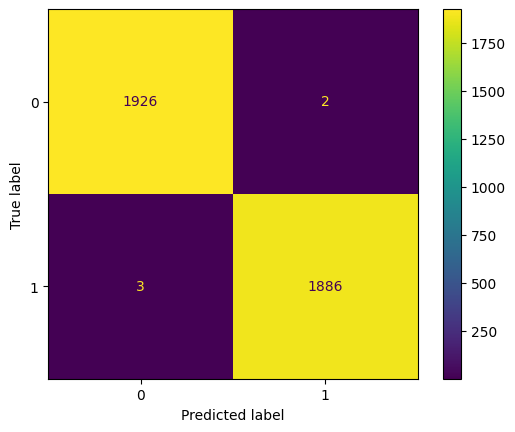

In [89]:
# Confusion Matrix for Champion Model

# Creation of Confusion Matrix
rf_cm_final = confusion_matrix(y_test, y_pred_final)

# Create CM Display
disp3 = ConfusionMatrixDisplay(confusion_matrix=rf_cm_final, display_labels=rf_cv.classes_)

# Plot CM
disp3.plot()
plt.show()

Only 3 false negatives and 2 false positives, revealing even better results

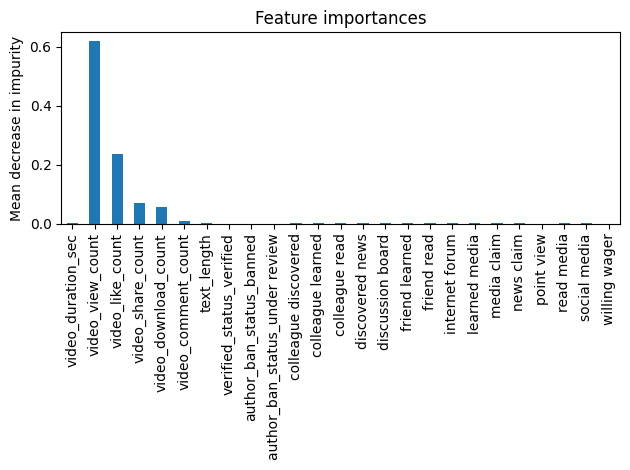

In [90]:
# Feature Importances
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()


The top 5 most important features to predictive 'claim_status' within the model are: 
* video_view_count
* video_like_count
* video_share_count
* video_download_count
* video_comment_count

## Summary and Business Recommendations

### Summary

The goal of this analysis was explore the dataset to find hidden trends, discover which features are important to prediction model, and decide which model was best at classifying content as a `claim` or `opinion`. The most important features to the prediction model were video_view_count, video_like_count, video_share_count, video_download_count, and video_comment_count as well the Natural Language Processed features. The importance of these features were defined by the Random Forest model and the decisions it made through cross-validation and ensemble learning. If the model to be reworked, these features along with the NLP features will be included in the final model and no additional features to be added. 

Further, hidden trends discovered included the length of 'claim' video_transcription_text was longer on average for than videos that were deemed to be 'opinions'. This may reveal that opinionated content is more so for the purpose of entertainment rather than the spread of misinformation. Additonally, users with an author_ban_status of 'under review' or 'banned' were seemingly obtaining significantly more views on average than accounts that were 'active'. This may be due to increased views due to misinformation spreading like wildfire or bots to boost views and engagement. Lastly, account owners with author_ban_status that were deemed as 'active' users posted significantly more 'opinion' based content than account owners that posted 'claim' based content with a banned status. This reveals the disparity between active users and the content they post, but also that banned users almost always posted 'claim' based content.

The champion model chosen was the Random Forest Model as it relayed nearly perfect scores to the Validation and Test datasets. These results affirm its success of a recall score of 99% with only 3 false negative predictions and 2 false postive predictions on the Test dataset. This may cause concern for overfitting that can be further tested with suplementary data.

### Business Recommendations

The Random Forest Model is best suited to the task of classifying content posted by TikTok users of 'claim_status' as claim or opinion. The model produced recall, precision, accuracy, and F1-scores of 99% across all scoring metrics. The model's predictive features were related to user engagement features related to each video, and can be used as a basis for similar models. No new features are necessary to be added given the model's success and can be further tested on real-time data to determine its readiness for deployment.